<a href="https://colab.research.google.com/github/Sukhdeep2006/Learning-TensorFlow/blob/main/004_TF_More_With_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this Notebook  

** We will continue to work with CNNs.   
** we will use Colored images (RGB channels) for a binary classification.  
** We will figure out if our model is overfitting.  
** We will work on Data Augmentation and DropOut as possible solutions to over-fitting.    


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import tensorflow.keras.utils as utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Data Loading

To build our image classifier, we will download the labelled images of the Cats and Dogs from the learning datasets provided by google.   
We will make use of ImageDataGenerator whihc will read the data from the disk.

In [ ]:
_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = utils.get_file('cats_and_dogs_filtered.zip',origin= _url,extract = True)
zip_dir_base = os.path.dirname(zip_dir)



68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
print(zip_dir)
print(zip_dir_base, '\n\n')

# We will write a Unix command (followed by ! sign) to explore the base directory where we downloaded the image files.

!find $zip_dir_base -type d -print

/root/.keras/datasets/cats_and_dogs_filtered.zip
/root/.keras/datasets 


/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
base_dir =  os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir =  os.path.join(base_dir,'train')
validation_dir =  os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs' )


In [ ]:
# we will get the count of training and validation images available in the respective directories.

num_cats_tr = len(os.listdir(train_cats_dir))  
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
num_total_tr = num_cats_tr + num_dogs_tr
num_total_val = num_cats_val + num_dogs_val




### Lets fix the batch size to 100 and the image size to 150 x 150 pixels

In [ ]:
BATCH_SIZE = 100
IMAGE_SIZE = 150
classes = ['cat','dog']

### Data Preparation   

 ** We will rescale the images first and then create an Image generator whihc will fetch 100 (batch_size) images at a time for the model.

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./255)

#train_image_generator = ImageDataGenerator(rescale= 1./255, 
#                               horizontal_flip=True, 
#                               rotation_range=40, 
#                               width_shift_range=0.2, 
#                               height_shift_range=0.2, 
#                               shear_range=0.2,
#                               zoom_range = 0.2, 
#                               fill_mode = 'nearest')


validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                           batch_size = BATCH_SIZE, 
                                                           shuffle = True,
                                                           class_mode = 'binary')

validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                           target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                           batch_size = BATCH_SIZE, 
                                                           shuffle = True,
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Lets grab some images, plot them to visualise before we use them for our model.

In [ ]:
#print(sample_train_images[1].shape)

def plot_images(images_arr):  
  fix, ax = plt.subplots(1,len(images_arr), figsize = (20,20))
  ax = ax.flatten()
  for image, ax in zip(images_arr, ax):
    ax.imshow(image)
  plt.tight_layout()
  plt.show()

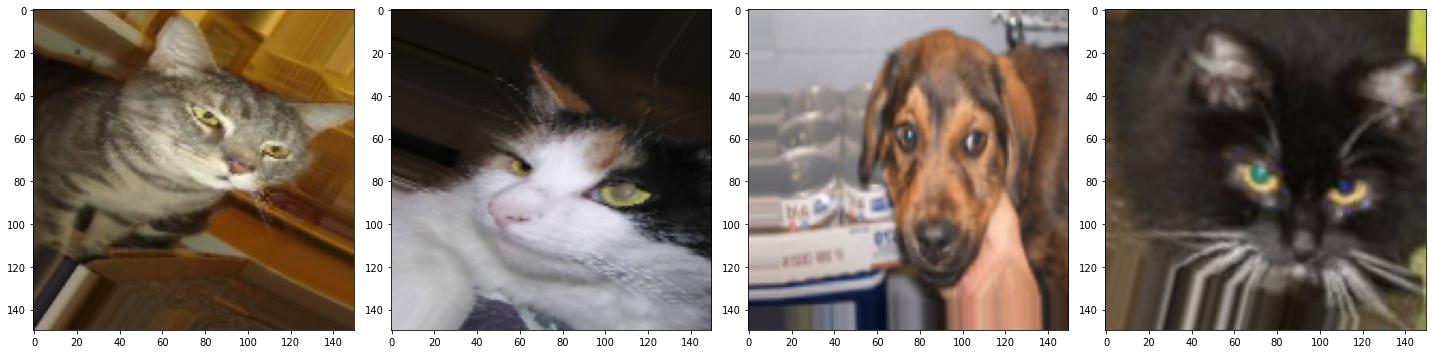

In [ ]:
sample_train_images, sample_labels = next(training_data_gen)
plot_images(sample_train_images[:4])


### Looks Awsome. Lets jump right into it and start creating our model.

In [ ]:
model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32, (3,3) ,activation='relu',input_shape =(150,150,3)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Flatten(),

                tf.keras.layers.Dense(512, activation = 'relu'),
                tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

### We have defined the model with ~3.5 million parameters to learn for classifying the dogs vs cats images.   
** Lets now train the model.
** Since we are using the ImageDataGenerator for providing the input samples, we will use fit_generator method to train the model instead of fit, as we used previously.

In [ ]:
EPOCHS = 20

#history = model.fit_generator(train_data_gen, 
#                              epochs=EPOCHS, 
#                              steps_per_epoch=math.ceil(num_total_tr/BATCH_SIZE), 
#                              validation_data = validation_data_gen, 
#                              validation_steps = math.ceil(num_total_val/BATCH_SIZE)
#)

history = model.fit(training_data_gen, 
                    epochs=EPOCHS, 
                    steps_per_epoch=math.ceil(num_total_tr/BATCH_SIZE), 
                    validation_data = validation_data_gen, 
                    validation_steps = math.ceil(num_total_val/BATCH_SIZE)
)



Epoch 1/20
20/20 [==============================] - 17s 837ms/step - loss: 0.5555 - accuracy: 0.7110 - val_loss: 0.5047 - val_accuracy: 0.7390
Epoch 2/20
20/20 [==============================] - 16s 812ms/step - loss: 0.5248 - accuracy: 0.7345 - val_loss: 0.5538 - val_accuracy: 0.7260
Epoch 3/20
20/20 [==============================] - 16s 801ms/step - loss: 0.5312 - accuracy: 0.7295 - val_loss: 0.5053 - val_accuracy: 0.7470
Epoch 4/20
20/20 [==============================] - 16s 803ms/step - loss: 0.5216 - accuracy: 0.7425 - val_loss: 0.5129 - val_accuracy: 0.7550
Epoch 5/20
20/20 [==============================] - 16s 803ms/step - loss: 0.5179 - accuracy: 0.7455 - val_loss: 0.5410 - val_accuracy: 0.7240
Epoch 6/20
20/20 [==============================] - 16s 810ms/step - loss: 0.5024 - accuracy: 0.7545 - val_loss: 0.4879 - val_accuracy: 0.7740
Epoch 7/20
20/20 [==============================] - 16s 803ms/step - loss: 0.5167 - accuracy: 0.7470 - val_loss: 0.4917 - val_accuracy: 0.7700

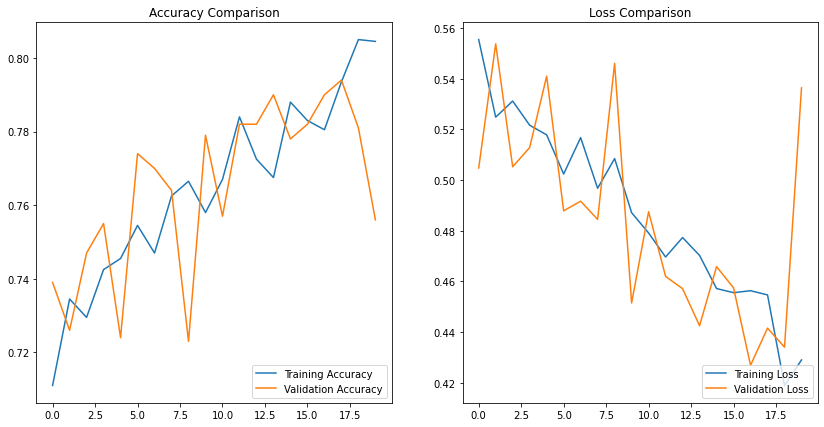

In [ ]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.title('Accuracy Comparison')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.title('Loss Comparison')
plt.legend(loc='lower right')
plt.show()




### We clearly see from the above image that the training accuracy for our model is near perfect but that is not true for the validation set. This means our model doesnt generalise well and is not expected to do well on the unforseen data. This is a classic example of overfitting. The model has memorised the training data set.

Lets explore a few options to address the problem of overfitting. 

** We will make use of Image Augmentation to make our training set more diverse and hard to be memorised.

** We will also explore the concept of Dropout for fixin the overfitting.

In [ ]:
#train_image_generator = ImageDataGenerator(rescale = 1./255)
train_image_generator = ImageDataGenerator(rescale= 1./255, 
                               horizontal_flip=True, 
                               rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.2,
                               zoom_range = 0.2, 
                               fill_mode = 'nearest')

validation_image_generator = ImageDataGenerator(rescale = 1./255)


training_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                           batch_size = BATCH_SIZE, 
                                                           shuffle = True,
                                                           class_mode = 'binary')

validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                           target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                           batch_size = BATCH_SIZE, 
                                                           shuffle = True,
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


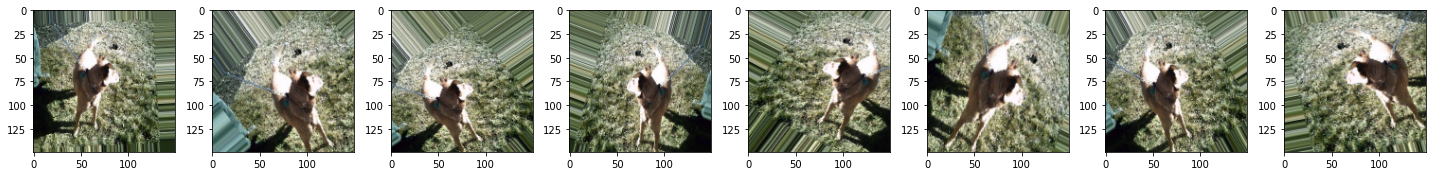

In [ ]:
augmented_images = [training_data_gen[0][0][0] for i in range(8)]
plot_images(augmented_images)

In [ ]:
model_2 = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32, (3,3) ,activation='relu',input_shape =(150,150,3)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3) ,activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Flatten(),

                tf.keras.layers.Dense(512, activation = 'relu'),
                tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model_2.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
EPOCHS = 120

history = model_2.fit(training_data_gen, 
                    epochs=EPOCHS, 
                    steps_per_epoch=math.ceil(num_total_tr/BATCH_SIZE), 
                    validation_data = validation_data_gen, 
                    validation_steps = math.ceil(num_total_val/BATCH_SIZE)
)


Epoch 1/120
20/20 [==============================] - 48s 796ms/step - loss: 0.7201 - accuracy: 0.4990 - val_loss: 0.6897 - val_accuracy: 0.6170
Epoch 2/120
20/20 [==============================] - 16s 803ms/step - loss: 0.6931 - accuracy: 0.5200 - val_loss: 0.6894 - val_accuracy: 0.6470
Epoch 3/120
20/20 [==============================] - 16s 813ms/step - loss: 0.6880 - accuracy: 0.5640 - val_loss: 0.6766 - val_accuracy: 0.6430
Epoch 4/120
20/20 [==============================] - 16s 802ms/step - loss: 0.6629 - accuracy: 0.6020 - val_loss: 0.6898 - val_accuracy: 0.5590
Epoch 5/120
20/20 [==============================] - 16s 804ms/step - loss: 0.6726 - accuracy: 0.5930 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 6/120
20/20 [==============================] - 16s 810ms/step - loss: 0.6487 - accuracy: 0.6210 - val_loss: 0.6420 - val_accuracy: 0.6060
Epoch 7/120
20/20 [==============================] - 16s 811ms/step - loss: 0.6505 - accuracy: 0.6230 - val_loss: 0.6485 - val_accuracy:

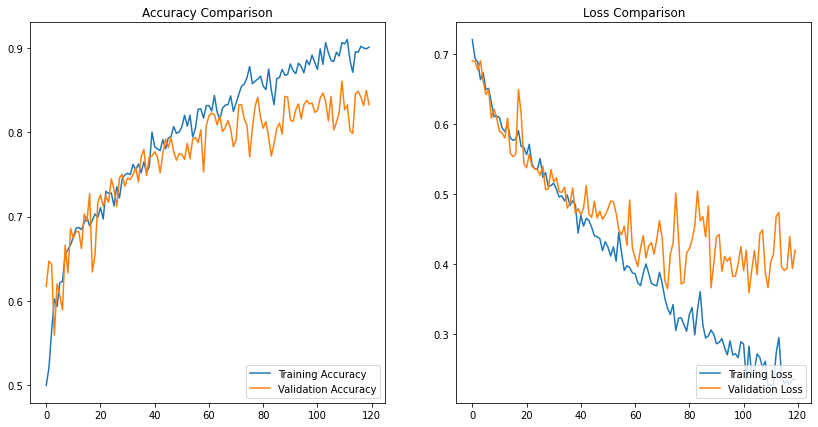

In [ ]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.title('Accuracy Comparison')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.title('Loss Comparison')
plt.legend(loc='lower right')
plt.show()